# US Gun Deaths

Exploring gun deaths in the US using data from 2012-2014 provided by FiveThirtyEight. Looking to find percentages and perspectives on the issue as a whole, instead of relying on data from the media. Due to recent events, I'm curious how gun deaths stack up relating to gender and race. Specifically the most common combination of "black" and "male" are statistically significant or just a push from media sources.

In [21]:
import csv
import datetime
import matplotlib.pyplot as plt

f = open("guns.csv", "r")
data = list(csv.reader(f))

headers = data[0]
data = data[1:]

print(headers)
print(data[:5])

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


# Organizing Data
We're now going to organize the data into dictionaries based on year, year & month, sex, and race. This will hopefully let us see patterns amoung the data.

In [16]:
year_counts = {}

years = [row[1] for row in data]
for year in years:
    if year in year_counts:
        year_counts[year] +=1
    else:
        year_counts[year] = 1
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

Not enough data to make any distinct claims here. But it's interesting that the gun deaths have stayed relatively constant. The dip in 2013 was immediately corrected in 2014. 

In [3]:
dates = [datetime.datetime(year = int(row[1]), month = int(row[2]), day = 1) 
         for row in data]

In [18]:
date_counts = {}

for date in dates:
    if date in date_counts:
        date_counts[date] +=1
    else:
        date_counts[date] = 1

# Gender, Race, and Police Involvement

In [5]:
sex = [row[5] for row in data]
race = [row[7] for row in data]
police = [row[4] for row in data]

sex_counts = {}
race_counts = {}
police_counts = {}

for row in sex:
    if row in sex_counts:
        sex_counts[row] += 1
    else:
        sex_counts[row] = 1
for row in race:
    if row in race_counts:
        race_counts[row] += 1
    else:
        race_counts[row] = 1
for pol in police:
    if pol in police_counts:
        police_counts[pol] += 1
    else:
        police_counts[pol] = 1
        
race_counts

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

In [15]:
sex_counts

{'F': 14449, 'M': 86349}

In [14]:
police_counts

{'0': 99396, '1': 1402}

It is significant to note that men have almost a 5x increase in gun related deaths than women. It's also noteworthy, that gun deaths related to police interaction accounts for only 1/10 of all gun deaths. Contrary to media prevelance, there are many more gun deaths that do not involve police interaction. 

# Representing the Percentages as Proportion of the Population

While the racial breakdown is interesting, it doesn't mean anything without a corresponding breakdown of the proportion of each race in the US. We will draw data from the census data to get more perspective on the percentages of gun deaths by race.

In [6]:
f = open("census.csv", "r")
census = list(csv.reader(f))

In [7]:
mapping = {}

mapping['White'] = int(census[1][11])
mapping['Black'] = int(census[1][13])
mapping['Asian/Pacific Islander'] = int(census[1][15] + census[1][16])
mapping['Native American/Native Alaskan'] = int(census[1][14])
mapping['Hispanic'] = int(census[1][12])

In [8]:
race_per_hundredk = {}
for key in race_counts:
    race_per_hundredk[key] = (race_counts[key]/mapping[key])*100000
race_per_hundredk

{'Asian/Pacific Islander': 1.9655343742560163e-05,
 'Black': 622.9699858751396,
 'Hispanic': 22.41455321139654,
 'Native American/Native Alaskan': 6.049005786200562,
 'White': 148.45318957405297}

This result is more informed. We can see that black people has a much higher chance of a gun related death. White people are about 1/3 as likely, and from there it's very unlikley for any other race. Asians have almost no chance to be related in a gun death. 

# Homicides

In [9]:
intents = [row[3] for row in data]

homicide_race_counts = {}
for i, r in enumerate(race):
    if intents[i] == "Homicide":
        if r in homicide_race_counts:
            homicide_race_counts[r] +=1
        else:
            homicide_race_counts[r] = 1

homicide_race_per_hundredk = {}
for key in mapping:
    homicide_race_per_hundredk[key] = (homicide_race_counts[key]/mapping[key])*100000

homicide_race_per_hundredk

{'Asian/Pacific Islander': 8.286076283628304e-06,
 'Black': 521.7266665703972,
 'Hispanic': 13.997294701064964,
 'Native American/Native Alaskan': 2.1504644343526533,
 'White': 20.50064654247418}

Homicides account for almost 84% of black gun deaths. That is incredible and sad. 

# Suicides

Let's look into suicide rates per year and per month and by gender and race.

In [10]:
suicide_race_counts = {}

def suicidebyrace(dictionary, lst):
    for i, row in enumerate(lst):
        if intents[i] == "Suicide":
            if row in dictionary:
                dictionary[row] += 1
            else:
                dictionary[row] =1
    return dictionary
  

suicide_by_race_dict = suicidebyrace(suicide_race_counts, race) 

suicide_per_100k = {}
for key in mapping:
    suicide_per_100k[key] = (suicide_by_race_dict[key]/mapping[key])*100000


In [11]:
suicide_per_100k

{'Asian/Pacific Islander': 1.1043160700005522e-05,
 'Black': 89.10267826819906,
 'Hispanic': 7.8781365809508355,
 'Native American/Native Alaskan': 3.6610667517353455,
 'White': 124.10208815457312}

Here we can see that white people have the highest rate of suicide by gun. Followed by black people. The other races are incredibly low and for Asians it's almost non-existant. The stereotype I aimed to investigate is validated. Black males do have a much higher chance than any other race or gender to be related to gun deaths. 

# Time of Year

Let's look at if time of year effects homicides or suicides.

In [12]:
#We already have intents and dates as lists from above
homicide_month_count = {}
suicide_month_count = {}

#just for brevity, I'll make a function that takes a keyword, and dict, and
#increment one if the keyword is found, or add a key if it's not
def AddDict(key, dct):
    if key in dct:
        dct[key] += 1
    else:
        dct[key] = 1

for i, date in enumerate(dates):
    if intents[i] == "Homicide":
        AddDict(date.month, homicide_month_count)
for i, date in enumerate(dates):
    if intents[i] == "Suicide":
        AddDict(date.month, suicide_month_count)
        
homicide_month_count, suicide_month_count

({1: 2829,
  2: 2178,
  3: 2780,
  4: 2845,
  5: 2976,
  6: 3130,
  7: 3269,
  8: 3125,
  9: 2966,
  10: 2968,
  11: 2919,
  12: 3191},
 {1: 5220,
  2: 4732,
  3: 5309,
  4: 5438,
  5: 5506,
  6: 5367,
  7: 5514,
  8: 5421,
  9: 5343,
  10: 5256,
  11: 5086,
  12: 4983})

Here we can see that suicides account for more deaths than homicides. Also, homicides look to peak in the summer months and december. Perhaps due to ease of being outside or holiday stress. They are at an incredible low in February. Suicides are also at a low in February and December, which I did not expect. Other than those months, it's faily constant around 5400. 

# Education

Let's look at education breakdowns. I would assume the least educated a person was, the more likely they are to be involved in a gun related death. Let's test that.

Text(0.5,1,'Education vs. Gun Deaths')

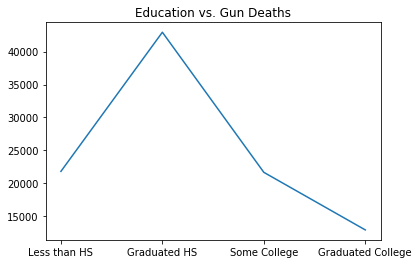

In [30]:
education = [row[10] for row in data]

#Let's decode the number-meaning pairs to make the data eaiser to see    
decode = ["Less than High School", "Graduated High School", "Some College", 
         "Graduated College (at least)", "Not Available", "NA"]
newlist = []

#There are so
for row in education:
    try:
        newlist.append(decode[int(row)-1])
    except Exception:
        pass
    
education_counts = {}

for row in newlist:
    AddDict(row, education_counts)

education_counts
x = [0,1,2,3]
y = [21823, 42927, 21680, 12946]
xlabel = ["Less than HS", "Graduated HS", "Some College", "Graduated College"]
% matplotlib inline
plt.plot(x,y)
plt.xticks(x, xlabel)
plt.title("Education vs. Gun Deaths")

While the graduated from college decrease was expected, it's interesting that there is a decided peak for deaths in the "Graduated from High School" category. The death rate doubles after graduation high school, then halves after each subsequent milestone.